# 一、读取训练集

In [2]:
path = '../搜狗新闻整理/总整理/data/train.txt'
file_list = open(path, 'rb').readlines()

In [3]:
len(file_list)

35000

In [4]:
import pandas as pd
#创建一个空的Dataframe
result =pd.DataFrame(columns=('content','tag'))

In [5]:
import re
qq = file_list[0].decode('utf8').split('\t')[0].strip().replace(" ",'')
re.sub('([^\u4e00-\u9fa5\u0030-\u0039\u0041-\u007a])', '', qq)

'北极上空惊现臭氧空洞臭氧减少幅度打破记录据新华社电一个国际研究小组2日发表的报告说他们对今年春天观测到的北极上空臭氧减少的数据进行了分析最终确认这次北极臭氧减少幅度打破了观测记录首次出现了类似南极上空的臭氧空洞美国加拿大芬兰丹麦等国研究人员共同完成的这份报告发表在自然杂志网站上报告说对今年春天北极上空臭氧观测数据的分析显示在18到20公里的高空臭氧减少的幅度超过了80可谓史无前例其程度可与南极臭氧空洞相提并论可以认为北极首次出现了臭氧空洞研究人员分析北极臭氧此次大幅减少的原因是从去年冬天到今年春天北极地区寒冷天气持续时间异乎寻常的长在寒冷条件下能破坏臭氧的含氯化合物会更活跃导致了臭氧空洞的出现臭氧是由三个氧原子组成的氧同素异形体距地表20公里左右高空存在一个臭氧层可以吸收部分对人体有害的紫外线暴露在这些紫外线下可导致人们皮肤烧伤甚至患上皮肤癌近几十年来由于人类释放了大量氯氟烃等破坏臭氧的物质臭氧层不时出现一些空洞特别是在南极地区每年冬天都会观测到臭氧空洞'

In [6]:
import re
for item in file_list:
    line = item.decode('utf8').split('\t')
    # 去除非汉字、非数字、非字母的其他符号
    content = line[0].strip().replace(" ",'')
    content = re.sub('([^\u4e00-\u9fa5\u0030-\u0039\u0041-\u007a])', '', content)
    tag = line[1].strip()
    result=result.append(pd.DataFrame({'content':[content],'tag':[tag]}),ignore_index=True)

In [7]:
result

,content,tag
0,北极上空惊现臭氧空洞臭氧减少幅度打破记录据新华社电一个国际研究小组2日发表的报告说他们对今年...,3
1,中国经济网北京月日综合报道记者袁志丽二十国集团领导人第七次峰会日在墨西哥洛斯卡沃斯开幕一些主...,0
2,新华网天津月日电记者周润健蔡玉高在欣赏完了美丽的月偏食和震撼的金星凌日之后月天宇的第三场特殊...,9
3,本报讯记者陈小平从月日至日为第三次志愿填报时间我省考生可填报本科三批专项计划专科批高职高专一...,2
4,前排空间和后排空间车身和轴距均不算小但是内部空间并不能让人满意身材比较高大的人坐进去就会感觉...,5
...,...,...
34995,乐高印第安纳琼斯2冒险继续公布当年乐高与蝙蝠侠结合产生了乐高蝙蝠侠接着又与LucasArts...,7
34996,韩国媒体声称解放军正在中朝界河鸭绿江上进行渡江演练并公布图片和影像资料韩国媒体对此大加猜测认...,4
34997,月广州市汽车销售数据表明市场资源开始向强势品牌集中图文本报记者向寒松本报记者独家获得的有关数...,5
34998,研究称尼罗河美女半身像或经美化图古埃及王后奈费尔提蒂Nefertiti素有尼罗河美女之称新浪...,3


# 二、去除重复

In [9]:
# 显示和其他重复了的内容
news = result
print(news.duplicated().sum())
display(news[news.duplicated()])

1481


,content,tag
251,您所要访问的房源信息不存在或已被删除个人登录企业登录,1
415,企业专区自动抓取最新新闻览尽企业所有产品查阅网友评论尽在企业专区,5
602,资料图泰国总理拜见泰国公主的礼节实在太销魂了人民日报刊登了泰王国总理英拉西那瓦阁下致中华人民...,4
637,您所要访问的房源信息不存在或已被删除个人登录企业登录,1
797,本网站提供之资料或信息仅供投资者参考不构成投资建议搜狐财经频道联系方式热线电话或,0
...,...,...
34969,年我们为孙见坤不平为唐骏不齿搜狐教育频道诚邀各方嘉宾盘点一年新闻人物我们期盼国家中长期教育改...,2
34975,搜狐汽车月日讯据路透社报道德国大众汽车上周五证实由于怀疑其在华合作伙伴一汽集团盗用了自己在动...,5
34979,每个国家有它自己的国民性格和历史积累不能说俄罗斯的乱就一定比美国的差近代以来俄罗斯一直是开疆...,4
34992,前摘中国若使用其日益现代化和强大的武装部队可轻而易举控制南海有争议地区与中国相比菲律宾军队微...,4


In [10]:
news.drop_duplicates(inplace=True)
print(news.duplicated().sum())

0


# 三、文本内容清洗

In [11]:
#正则匹配去除数字、符号、空格
import re
from string import digits
#正则化
re_obj = re.compile(
    r"[!\"#$%&'()*+,-./:;<=>?@[\\\]^_`{|}~—！，。？、￥…（）：【】《》‘’“”\s]+")
re_obj2=re.compile(
    r'[a-zA-Z0-9’!"#$%&\'()*+,-.<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+')

def clear(text):
    res=re_obj.sub('', text)
    res =re.sub('[^\u4e00-\u9fa5]+','',text)
    return res



news['content'] = news['content'].apply(clear)
news.sample(5)

,content,tag
20137,哈尔滨年月日体育冰壶国际邀请赛哈尔滨一队夺得男子组冠军月日哈尔滨一队选手在比赛中当日在哈尔滨...,6
22997,北京时间月日第八届百灵杯职业女子业余强豪擂台赛第六局在广西田东县开赛由女队曹又尹三段登擂挑战...,6
18697,陈妍希马不停蹄为电影努力做宣传外更将推出唱片皮肤白滑的陈妍希得到护肤品牌垂青任代言人陈妍希穿...,8
2775,摄影师拍摄珠峰星空美丽似万花筒组图新浪科技讯北京时间月日消息这般景象看上去像不像一个万花筒但...,3
14392,大作狙击手幽灵战士或再跳票原本预计在月发售的游戏狙击手幽灵战士被延期至了月日不过发售日将至却...,7


In [12]:
# 统计最长字符数   一条新闻最长会有26038
print("max length: "+str(news['content'].map(lambda x: len(x)).max()))
print("min length: "+str(news['content'].map(lambda x: len(x)).min()))


max length: 26038
min length: 0


In [13]:
# 发现有一些行为空
for i,row in news.iterrows():
    if len(row['content']) == 0:
        print(row)

content     
tag        3
Name: 7070, dtype: object
content     
tag        9
Name: 32207, dtype: object
content     
tag        5
Name: 34874, dtype: object


In [14]:
# 去除字符长度小于20的标本
news = news[~(news.content.str.len()<20)]
display(news)

,content,tag
0,北极上空惊现臭氧空洞臭氧减少幅度打破记录据新华社电一个国际研究小组日发表的报告说他们对今年春...,3
1,中国经济网北京月日综合报道记者袁志丽二十国集团领导人第七次峰会日在墨西哥洛斯卡沃斯开幕一些主...,0
2,新华网天津月日电记者周润健蔡玉高在欣赏完了美丽的月偏食和震撼的金星凌日之后月天宇的第三场特殊...,9
3,本报讯记者陈小平从月日至日为第三次志愿填报时间我省考生可填报本科三批专项计划专科批高职高专一...,2
4,前排空间和后排空间车身和轴距均不算小但是内部空间并不能让人满意身材比较高大的人坐进去就会感觉...,5
...,...,...
34994,苹果公司即将获得在中国注册的商标代价是万美元的真金白银月日深圳市中级人民法院向国家工商总局商...,9
34995,乐高印第安纳琼斯冒险继续公布当年乐高与蝙蝠侠结合产生了乐高蝙蝠侠接着又与合作推出了乐高星球大...,7
34997,月广州市汽车销售数据表明市场资源开始向强势品牌集中图文本报记者向寒松本报记者独家获得的有关数...,5
34998,研究称尼罗河美女半身像或经美化图古埃及王后奈费尔提蒂素有尼罗河美女之称新浪科技讯北京时间月日...,3


# 四、分词和去除停用词

In [15]:
#jieba分词
import jieba
def cut_word(text):
    return jieba.cut(text)
news['content'] = news['content'].apply(cut_word)
news.sample(5)

C:\Users\12849\AppData\Local\Temp/ipykernel_45796/346849601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['content'] = news['content'].apply(cut_word)


,content,tag
27461,<generator object cut at 0x000001DA48E8BA50>,3
6016,<generator object cut at 0x000001DA47C84D60>,5
8213,<generator object cut at 0x000001DA47CC0270>,2
23380,<generator object cut at 0x000001DA48E20740>,3
23989,<generator object cut at 0x000001DA48E30580>,10


In [16]:
#去除停用词
def get_stopword():
    s = set()
    with open('../all_stopwords.txt','r',encoding='UTF-8') as f:
        for line in f:
            s.add(line.strip())
    return s

def remove_stopword(words):
    return [word for word in words if word not in stopword]

stopword = get_stopword()
news['content'] = news['content'].apply(remove_stopword)
news.sample(5)
news.head()

Building prefix dict from D:\Anaconda3\envs\LoveZiqi\lib\site-packages\jieba\dict.txt ...
Loading model from cache C:\Users\12849\AppData\Local\Temp\jieba.cache
Loading model cost 0.6731538772583008 seconds.
Prefix dict has been built succesfully.
C:\Users\12849\AppData\Local\Temp/ipykernel_45796/914136541.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['content'] = news['content'].apply(remove_stopword)


,content,tag
0,"[北极, 上空, 惊现, 臭氧, 空洞, 臭氧, 减少, 幅度, 打破记录, 新华社, 电,...",3
1,"[中国, 经济网, 北京, 综合, 报道, 记者, 袁志丽二, 十国集团, 领导人, 第七次...",0
2,"[新华网, 天津, 日电, 记者, 周润, 健, 蔡玉高, 欣赏, 完, 美丽, 月偏食, ...",9
3,"[本报讯, 记者, 陈小平, 第三次, 志愿, 填报, 时间, 我省, 考生, 填报, 本科...",2
4,"[前排, 空间, 后排, 空间, 车身, 轴距, 均, 不算, 内部空间, 满意, 身材, ...",5


3     4267
10    3112
7     3108
0     3097
8     3096
1     3040
9     2945
2     2924
5     2916
6     2913
4     1948
Name: tag, dtype: int64


<AxesSubplot:>

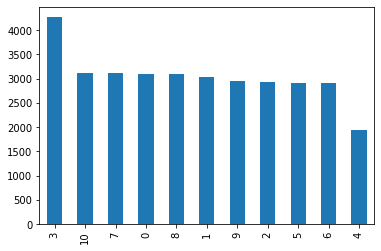

In [17]:
#查看每个标签拥有条数
t= news['tag'].value_counts()
print(t)
t.plot(kind='bar')

# 五、构建词云图

In [18]:
from itertools import chain
from collections import Counter

li_2d = news['content'].tolist()
li_1d = list(chain.from_iterable(li_2d))

# 二维列表转换为一维列表

print(f'总词汇量:{len(li_1d)}')
c= Counter(li_1d)
print(f'不重复词汇量:{len(c)}')
common = c.most_common(15)
print(common)

总词汇量:6887253
不重复词汇量:256277
[('中国', 31298), ('游戏', 19942), ('市场', 19246), ('公司', 18966), ('更', 18321), ('时间', 16515), ('发展', 15954), ('时', 15319), ('记者', 14688), ('新', 14645), ('北京', 14515), ('美国', 14158), ('企业', 12639), ('工作', 11714), ('玩家', 10855)]


In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(font_path=r'C:\Windows\Fonts\simfang.ttf',width=800,height=600)
# 可以自定义背景图：WordCloud(mask=plt.imread('文件路径'))
# li_2d = news['content'].tolist()
# li_1d = list(chain.from_iterable(li_2d))
# join_words = ''.join(li_1d)
# img = wc.generate(join_words)
# generate()该方法生成的词云图非严格按照词汇出现频率，不精确
# 传进去的参数需要前面加空格处理
# plt.figure(figsize=(15,10))
# plt.imshow(img)
# plt.axis('off')
# 关闭坐标轴
# wc.to_file('wordcloud.png'）

(-0.5, 799.5, 599.5, -0.5)

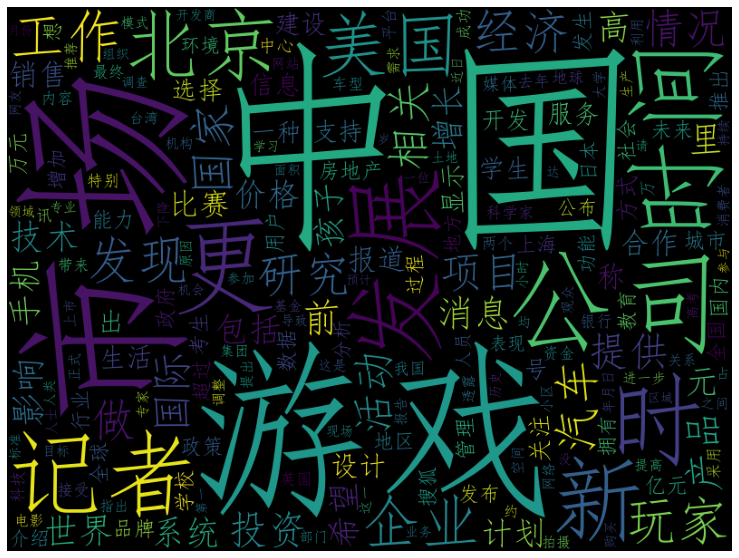

In [20]:
plt.figure(figsize=(15,10))
img = wc.generate_from_frequencies(c)
# generate_from_frequencies()该方法生成的词云图严格按照词汇出现频率
# 词汇出现频率越高，文字占比越大
# 传进去的参数为频数，前面不需要加空格处理
plt.imshow(img)
plt.axis('off')

# 六、构建训练与测试集

In [21]:
# 构建训练与测试集
def join(text_list):
    return " ".join(text_list)

news['content'] = news['content'].apply(join)
news.sample(5)

C:\Users\12849\AppData\Local\Temp/ipykernel_45796/934685048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['content'] = news['content'].apply(join)


,content,tag
30395,可观 超新星 爆发 将现 两个 太阳 景象 图 新浪 科技 讯 北京 时间 消息 澳大利亚 ...,3
34059,南 讯 昨日 亚马逊 中国 夏季 大促 强势 来袭 全网 联合 百万 选品 预计 总 让利 ...,0
29972,原厂 镜头 佳能 套 机元 作者 李金昊 佳能 采用 约 万 像素 图像 传感器 感应器 规...,3
29768,日期 赛事 中国 比勒菲尔德 中国 门兴 中国 维尔 瓦 中国 瑞士 中国 法国 中国 桑坦...,6
9165,全国性 房地产 救 市 方案 上交 国务院 一位 权威人士 记者 透露 市场 全国性 房地产...,10


In [22]:
from sklearn.model_selection import train_test_split

X = news['content']
y = news['tag']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)  # 3:1
print('训练集样本数：',y_train.shape[0],'测试集样本数：',y_test.shape[0])

训练集样本数： 25024 测试集样本数： 8342


# 七、TF-IDF构造词向量

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer（）对X向量化操作
vec = TfidfVectorizer(ngram_range=(1,2),analyzer='word',token_pattern=u"(?u)\\b\\w+\\b")
# ngram_range=(1,2)对切分的一维/二维元组再进行向量化，减少语句本来不同
# ——但切分出的单词相同带来的误差 
# 用训练集来构建词向量  然后让它fit测试集！
X_train_tran = vec.fit_transform(X_train)
X_test_tran = vec.transform(X_test)
display(X_train_tran,X_test_tran)
#注意：tf–idf不会减小向量维度，也不会减少向量中0的个数，只是将词的重要性(之前是出现次数表示特征重要性大小)以一种更合理的方式重新计算了

<25024x3391855 sparse matrix of type '<class 'numpy.float64'>'
	with 7879829 stored elements in Compressed Sparse Row format>

<8342x3391855 sparse matrix of type '<class 'numpy.float64'>'
	with 1708548 stored elements in Compressed Sparse Row format>

In [25]:
# 词袋模型向量化后会产生过多特征，用方差分析进行特征选择，选出与目标相对
# 变量最相关的20000个特征
from sklearn.feature_selection import f_classif

f_classif(X_train_tran,y_train)

(array([0.97122171, 0.97122171, 0.67178109, ..., 1.07642103, 0.67178109,
        0.67178109]),
 array([0.46612387, 0.46612387, 0.75177379, ..., 0.37622873, 0.75177379,
        0.75177379]))

In [26]:
# 使用方差分析降维
from sklearn.feature_selection import SelectKBest
import numpy as np

X_train_tran = X_train_tran.astype(np.float32)
X_test_tran = X_test_tran.astype(np.float32)
selector1 = SelectKBest(f_classif,k=min(20000,X_train_tran.shape[1]))
selector1.fit(X_train_tran,y_train)
character  = selector1.get_support(indices = True)
#print(character)
X_train_tran = selector1.transform(X_train_tran)
X_test_tran = selector1.transform(X_test_tran)
print(X_train_tran.shape,X_test_tran.shape)

(25024, 20000) (8342, 20000)


# 八、使用词袋构建词向量

In [27]:
## 词袋构建向量

from sklearn.feature_extraction.text import CountVectorizer  
vectorizer=CountVectorizer()
print("词频统计：")
X_train_bag = vectorizer.fit_transform(X_train)
X_test_bag = vectorizer.transform(X_test)
print(X_train_bag) # (文本序号，词序号)  出现次数


词频统计：
  (0, 112104)	2
  (0, 15450)	3
  (0, 216879)	4
  (0, 7638)	25
  (0, 96783)	6
  (0, 82209)	31
  (0, 103246)	2
  (0, 1263)	2
  (0, 104146)	2
  (0, 78347)	2
  (0, 48352)	4
  (0, 182390)	3
  (0, 25008)	5
  (0, 37537)	4
  (0, 208556)	12
  (0, 29062)	2
  (0, 16356)	2
  (0, 58006)	2
  (0, 133901)	2
  (0, 95427)	12
  (0, 145256)	23
  (0, 66266)	11
  (0, 48047)	5
  (0, 95424)	35
  (0, 20523)	17
  :	:
  (25023, 114024)	1
  (25023, 55019)	1
  (25023, 106237)	2
  (25023, 112910)	1
  (25023, 86548)	1
  (25023, 109834)	1
  (25023, 175910)	1
  (25023, 8058)	1
  (25023, 3909)	1
  (25023, 104748)	6
  (25023, 32849)	1
  (25023, 101066)	1
  (25023, 25603)	2
  (25023, 209707)	1
  (25023, 160351)	1
  (25023, 37770)	1
  (25023, 71953)	1
  (25023, 154091)	1
  (25023, 40079)	1
  (25023, 178462)	1
  (25023, 203437)	1
  (25023, 203781)	1
  (25023, 93514)	1
  (25023, 138225)	1
  (25023, 49549)	7


In [28]:
X_train_bag.shape,X_test_bag.shape  #用训练集构建的词向量转换器fit测试集！

((25024, 218035), (8342, 218035))

In [29]:
# 使用方差分析降维
from sklearn.feature_selection import SelectKBest
import numpy as np

X_train_bag = X_train_bag.astype(np.float32)
X_test_bag = X_test_bag.astype(np.float32)
selector2 = SelectKBest(f_classif,k=min(20000,X_train_bag.shape[1]))
selector2.fit(X_train_bag,y_train)
character  = selector2.get_support(indices = True)
#print(character)
X_train_bag = selector2.transform(X_train_bag)
X_test_bag = selector2.transform(X_test_bag)
print(X_train_bag.shape,X_test_bag.shape)

(25024, 20000) (8342, 20000)


# 九、开始机器学习

In [32]:
# Softmax
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import linear_model
# Softmax预测tf-idf
model_softmax_regression = linear_model.LogisticRegression(solver='lbfgs',multi_class="multinomial",max_iter=10)
model_softmax_regression.fit(X_train_tran, y_train)
y_predict = model_softmax_regression.predict(X_test_tran)
accurcy = np.sum(y_predict == y_test) / len(y_test)
print(accurcy)

0.7873411651882043


D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       779
           1       0.98      0.70      0.82       758
          10       0.86      0.78      0.82       742
           2       0.92      0.80      0.86       737
           3       0.51      0.92      0.65      1025
           4       0.76      0.72      0.74       481
           5       0.94      0.80      0.87       782
           6       0.95      0.91      0.93       745
           7       0.97      0.84      0.90       772
           8       0.92      0.85      0.88       743
           9       0.76      0.57      0.65       778

    accuracy                           0.79      8342
   macro avg       0.84      0.78      0.80      8342
weighted avg       0.83      0.79      0.80      8342



In [34]:
# Softmax预测词袋
model_softmax_regression = linear_model.LogisticRegression(solver='lbfgs',multi_class="multinomial",max_iter=10)
model_softmax_regression.fit(X_train_bag, y_train)
y_predict = model_softmax_regression.predict(X_test_bag)
accurcy = np.sum(y_predict == y_test) / len(y_test)
print(accurcy)

0.8731719012227284


D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       779
           1       0.94      0.92      0.93       758
          10       0.85      0.89      0.87       742
           2       0.89      0.86      0.87       737
           3       0.86      0.83      0.84      1025
           4       0.86      0.86      0.86       481
           5       0.92      0.93      0.92       782
           6       0.94      0.96      0.95       745
           7       0.97      0.96      0.96       772
           8       0.89      0.94      0.92       743
           9       0.72      0.73      0.73       778

    accuracy                           0.87      8342
   macro avg       0.87      0.87      0.87      8342
weighted avg       0.87      0.87      0.87      8342



In [36]:
# KNN测TF-IDF
from sklearn.neighbors import KNeighborsClassifier

param = {'n_neighbors':[5,7,9,11],
        'weights':['uniform','distance'],
        'p':[ 2, 3, 4]
        }
gs = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param,
                 cv=2,  verbose=10)
gs.fit(X_train_tran,y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2; 1/24] START n_neighbors=5, p=2, weights=uniform........................
[CV 1/2; 1/24] END n_neighbors=5, p=2, weights=uniform;, score=0.385 total time=   6.1s
[CV 2/2; 1/24] START n_neighbors=5, p=2, weights=uniform........................
[CV 2/2; 1/24] END n_neighbors=5, p=2, weights=uniform;, score=0.507 total time=   7.1s
[CV 1/2; 2/24] START n_neighbors=5, p=2, weights=distance.......................
[CV 1/2; 2/24] END n_neighbors=5, p=2, weights=distance;, score=0.400 total time=   5.9s
[CV 2/2; 2/24] START n_neighbors=5, p=2, weights=distance.......................
[CV 2/2; 2/24] END n_neighbors=5, p=2, weights=distance;, score=0.532 total time=   6.6s
[CV 1/2; 3/24] START n_neighbors=5, p=3, weights=uniform........................
[CV 1/2; 3/24] END n_neighbors=5, p=3, weights=uniform;, score=nan total time=   0.0s
[CV 2/2; 3/24] START n_neighbors=5, p=3, weights=uniform........................
[CV 2/2; 3/24

D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
32 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\neighbors\_classification.py", line 200, in fit
    return self._fit(X, y)
  File "D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\neighbors\_base.py", line 518, in _fit
    raise ValueError(
ValueError: Metric 'minkowski' not valid for spa

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 11], 'p': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=10)

In [38]:

y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61       779
           1       0.91      0.77      0.83       758
          10       0.92      0.62      0.74       742
           2       0.91      0.70      0.79       737
           3       0.79      0.72      0.76      1025
           4       0.18      0.91      0.30       481
           5       0.93      0.59      0.73       782
           6       0.95      0.74      0.83       745
           7       0.97      0.72      0.82       772
           8       0.83      0.60      0.70       743
           9       0.75      0.45      0.56       778

    accuracy                           0.66      8342
   macro avg       0.80      0.67      0.70      8342
weighted avg       0.82      0.66      0.71      8342



In [54]:
# KNN测词袋
param = {'n_neighbors':[5,7,9,11],
        'weights':['uniform','distance'],
        'p':[ 2, 3, 4]
        }
gs = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param,
                 cv=2,  verbose=10)
gs.fit(X_train_bag,y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2; 1/24] START n_neighbors=5, p=2, weights=uniform........................
[CV 1/2; 1/24] END n_neighbors=5, p=2, weights=uniform;, score=0.615 total time=   6.8s
[CV 2/2; 1/24] START n_neighbors=5, p=2, weights=uniform........................
[CV 2/2; 1/24] END n_neighbors=5, p=2, weights=uniform;, score=0.611 total time=   6.6s
[CV 1/2; 2/24] START n_neighbors=5, p=2, weights=distance.......................
[CV 1/2; 2/24] END n_neighbors=5, p=2, weights=distance;, score=0.642 total time=   6.1s
[CV 2/2; 2/24] START n_neighbors=5, p=2, weights=distance.......................
[CV 2/2; 2/24] END n_neighbors=5, p=2, weights=distance;, score=0.635 total time=   6.3s
[CV 1/2; 3/24] START n_neighbors=5, p=3, weights=uniform........................
[CV 1/2; 3/24] END n_neighbors=5, p=3, weights=uniform;, score=nan total time=   0.0s
[CV 2/2; 3/24] START n_neighbors=5, p=3, weights=uniform........................
[CV 2/2; 3/24

D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
32 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\neighbors\_classification.py", line 200, in fit
    return self._fit(X, y)
  File "D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\neighbors\_base.py", line 518, in _fit
    raise ValueError(
ValueError: Metric 'minkowski' not valid for spa

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 11], 'p': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=10)

In [55]:
print(gs.best_params_)

y_hat = gs.best_estimator_.predict(X_test_bag)
print(classification_report(y_test,y_hat))

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       779
           1       0.89      0.78      0.83       758
          10       0.85      0.61      0.71       742
           2       0.53      0.81      0.64       737
           3       0.82      0.56      0.66      1025
           4       0.53      0.63      0.58       481
           5       0.63      0.85      0.72       782
           6       0.70      0.91      0.79       745
           7       0.93      0.82      0.87       772
           8       0.72      0.65      0.68       743
           9       0.61      0.51      0.56       778

    accuracy                           0.70      8342
   macro avg       0.71      0.70      0.70      8342
weighted avg       0.72      0.70      0.70      8342



In [47]:
# 决策树测tf-idf
from sklearn.tree import DecisionTreeClassifier

param= {
    "max_depth": np.arange(1, 20),  ## 决策树最大层数从1-19
    "min_samples_leaf": np.arange(1, 20) } ## 决策树子叶的最大样本数是1-19
# param = {'criterion':['gini','entropy'],
#         'max_depth':[10,15]
#         }
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs.fit(X_train_tran,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))


Fitting 2 folds for each of 361 candidates, totalling 722 fits
[CV 1/2; 1/361] START max_depth=1, min_samples_leaf=1...........................
[CV 1/2; 1/361] END max_depth=1, min_samples_leaf=1;, score=0.205 total time=   0.1s
[CV 2/2; 1/361] START max_depth=1, min_samples_leaf=1...........................
[CV 2/2; 1/361] END max_depth=1, min_samples_leaf=1;, score=0.206 total time=   0.0s
[CV 1/2; 2/361] START max_depth=1, min_samples_leaf=2...........................
[CV 1/2; 2/361] END max_depth=1, min_samples_leaf=2;, score=0.205 total time=   0.0s
[CV 2/2; 2/361] START max_depth=1, min_samples_leaf=2...........................
[CV 2/2; 2/361] END max_depth=1, min_samples_leaf=2;, score=0.206 total time=   0.0s
[CV 1/2; 3/361] START max_depth=1, min_samples_leaf=3...........................
[CV 1/2; 3/361] END max_depth=1, min_samples_leaf=3;, score=0.205 total time=   0.0s
[CV 2/2; 3/361] START max_depth=1, min_samples_leaf=3...........................
[CV 2/2; 3/361] END max_de

[CV 2/2; 25/361] END max_depth=2, min_samples_leaf=6;, score=0.233 total time=   0.1s
[CV 1/2; 26/361] START max_depth=2, min_samples_leaf=7..........................
[CV 1/2; 26/361] END max_depth=2, min_samples_leaf=7;, score=0.236 total time=   0.1s
[CV 2/2; 26/361] START max_depth=2, min_samples_leaf=7..........................
[CV 2/2; 26/361] END max_depth=2, min_samples_leaf=7;, score=0.233 total time=   0.1s
[CV 1/2; 27/361] START max_depth=2, min_samples_leaf=8..........................
[CV 1/2; 27/361] END max_depth=2, min_samples_leaf=8;, score=0.236 total time=   0.1s
[CV 2/2; 27/361] START max_depth=2, min_samples_leaf=8..........................
[CV 2/2; 27/361] END max_depth=2, min_samples_leaf=8;, score=0.233 total time=   0.1s
[CV 1/2; 28/361] START max_depth=2, min_samples_leaf=9..........................
[CV 1/2; 28/361] END max_depth=2, min_samples_leaf=9;, score=0.236 total time=   0.1s
[CV 2/2; 28/361] START max_depth=2, min_samples_leaf=9.........................

[CV 1/2; 50/361] END max_depth=3, min_samples_leaf=12;, score=0.285 total time=   0.2s
[CV 2/2; 50/361] START max_depth=3, min_samples_leaf=12.........................
[CV 2/2; 50/361] END max_depth=3, min_samples_leaf=12;, score=0.283 total time=   0.2s
[CV 1/2; 51/361] START max_depth=3, min_samples_leaf=13.........................
[CV 1/2; 51/361] END max_depth=3, min_samples_leaf=13;, score=0.285 total time=   0.2s
[CV 2/2; 51/361] START max_depth=3, min_samples_leaf=13.........................
[CV 2/2; 51/361] END max_depth=3, min_samples_leaf=13;, score=0.283 total time=   0.2s
[CV 1/2; 52/361] START max_depth=3, min_samples_leaf=14.........................
[CV 1/2; 52/361] END max_depth=3, min_samples_leaf=14;, score=0.285 total time=   0.2s
[CV 2/2; 52/361] START max_depth=3, min_samples_leaf=14.........................
[CV 2/2; 52/361] END max_depth=3, min_samples_leaf=14;, score=0.283 total time=   0.2s
[CV 1/2; 53/361] START max_depth=3, min_samples_leaf=15..................

[CV 2/2; 74/361] END max_depth=4, min_samples_leaf=17;, score=0.334 total time=   0.3s
[CV 1/2; 75/361] START max_depth=4, min_samples_leaf=18.........................
[CV 1/2; 75/361] END max_depth=4, min_samples_leaf=18;, score=0.335 total time=   0.3s
[CV 2/2; 75/361] START max_depth=4, min_samples_leaf=18.........................
[CV 2/2; 75/361] END max_depth=4, min_samples_leaf=18;, score=0.334 total time=   0.3s
[CV 1/2; 76/361] START max_depth=4, min_samples_leaf=19.........................
[CV 1/2; 76/361] END max_depth=4, min_samples_leaf=19;, score=0.334 total time=   0.3s
[CV 2/2; 76/361] START max_depth=4, min_samples_leaf=19.........................
[CV 2/2; 76/361] END max_depth=4, min_samples_leaf=19;, score=0.334 total time=   0.3s
[CV 1/2; 77/361] START max_depth=5, min_samples_leaf=1..........................
[CV 1/2; 77/361] END max_depth=5, min_samples_leaf=1;, score=0.378 total time=   0.5s
[CV 2/2; 77/361] START max_depth=5, min_samples_leaf=1....................

[CV 1/2; 99/361] END max_depth=6, min_samples_leaf=4;, score=0.417 total time=   0.6s
[CV 2/2; 99/361] START max_depth=6, min_samples_leaf=4..........................
[CV 2/2; 99/361] END max_depth=6, min_samples_leaf=4;, score=0.420 total time=   0.6s
[CV 1/2; 100/361] START max_depth=6, min_samples_leaf=5.........................
[CV 1/2; 100/361] END max_depth=6, min_samples_leaf=5;, score=0.417 total time=   0.5s
[CV 2/2; 100/361] START max_depth=6, min_samples_leaf=5.........................
[CV 2/2; 100/361] END max_depth=6, min_samples_leaf=5;, score=0.421 total time=   0.5s
[CV 1/2; 101/361] START max_depth=6, min_samples_leaf=6.........................
[CV 1/2; 101/361] END max_depth=6, min_samples_leaf=6;, score=0.417 total time=   0.5s
[CV 2/2; 101/361] START max_depth=6, min_samples_leaf=6.........................
[CV 2/2; 101/361] END max_depth=6, min_samples_leaf=6;, score=0.421 total time=   0.5s
[CV 1/2; 102/361] START max_depth=6, min_samples_leaf=7....................

[CV 2/2; 123/361] END max_depth=7, min_samples_leaf=9;, score=0.467 total time=   0.6s
[CV 1/2; 124/361] START max_depth=7, min_samples_leaf=10........................
[CV 1/2; 124/361] END max_depth=7, min_samples_leaf=10;, score=0.462 total time=   0.6s
[CV 2/2; 124/361] START max_depth=7, min_samples_leaf=10........................
[CV 2/2; 124/361] END max_depth=7, min_samples_leaf=10;, score=0.466 total time=   0.6s
[CV 1/2; 125/361] START max_depth=7, min_samples_leaf=11........................
[CV 1/2; 125/361] END max_depth=7, min_samples_leaf=11;, score=0.463 total time=   0.6s
[CV 2/2; 125/361] START max_depth=7, min_samples_leaf=11........................
[CV 2/2; 125/361] END max_depth=7, min_samples_leaf=11;, score=0.467 total time=   0.6s
[CV 1/2; 126/361] START max_depth=7, min_samples_leaf=12........................
[CV 1/2; 126/361] END max_depth=7, min_samples_leaf=12;, score=0.463 total time=   0.6s
[CV 2/2; 126/361] START max_depth=7, min_samples_leaf=12............

[CV 1/2; 148/361] END max_depth=8, min_samples_leaf=15;, score=0.483 total time=   0.7s
[CV 2/2; 148/361] START max_depth=8, min_samples_leaf=15........................
[CV 2/2; 148/361] END max_depth=8, min_samples_leaf=15;, score=0.495 total time=   0.7s
[CV 1/2; 149/361] START max_depth=8, min_samples_leaf=16........................
[CV 1/2; 149/361] END max_depth=8, min_samples_leaf=16;, score=0.483 total time=   0.7s
[CV 2/2; 149/361] START max_depth=8, min_samples_leaf=16........................
[CV 2/2; 149/361] END max_depth=8, min_samples_leaf=16;, score=0.495 total time=   0.7s
[CV 1/2; 150/361] START max_depth=8, min_samples_leaf=17........................
[CV 1/2; 150/361] END max_depth=8, min_samples_leaf=17;, score=0.483 total time=   0.7s
[CV 2/2; 150/361] START max_depth=8, min_samples_leaf=17........................
[CV 2/2; 150/361] END max_depth=8, min_samples_leaf=17;, score=0.495 total time=   0.7s
[CV 1/2; 151/361] START max_depth=8, min_samples_leaf=18...........

[CV 2/2; 172/361] END max_depth=10, min_samples_leaf=1;, score=0.519 total time=   1.1s
[CV 1/2; 173/361] START max_depth=10, min_samples_leaf=2........................
[CV 1/2; 173/361] END max_depth=10, min_samples_leaf=2;, score=0.516 total time=   1.0s
[CV 2/2; 173/361] START max_depth=10, min_samples_leaf=2........................
[CV 2/2; 173/361] END max_depth=10, min_samples_leaf=2;, score=0.519 total time=   1.1s
[CV 1/2; 174/361] START max_depth=10, min_samples_leaf=3........................
[CV 1/2; 174/361] END max_depth=10, min_samples_leaf=3;, score=0.515 total time=   1.0s
[CV 2/2; 174/361] START max_depth=10, min_samples_leaf=3........................
[CV 2/2; 174/361] END max_depth=10, min_samples_leaf=3;, score=0.518 total time=   1.0s
[CV 1/2; 175/361] START max_depth=10, min_samples_leaf=4........................
[CV 1/2; 175/361] END max_depth=10, min_samples_leaf=4;, score=0.515 total time=   0.9s
[CV 2/2; 175/361] START max_depth=10, min_samples_leaf=4...........

[CV 1/2; 197/361] END max_depth=11, min_samples_leaf=7;, score=0.528 total time=   1.0s
[CV 2/2; 197/361] START max_depth=11, min_samples_leaf=7........................
[CV 2/2; 197/361] END max_depth=11, min_samples_leaf=7;, score=0.533 total time=   1.1s
[CV 1/2; 198/361] START max_depth=11, min_samples_leaf=8........................
[CV 1/2; 198/361] END max_depth=11, min_samples_leaf=8;, score=0.527 total time=   1.0s
[CV 2/2; 198/361] START max_depth=11, min_samples_leaf=8........................
[CV 2/2; 198/361] END max_depth=11, min_samples_leaf=8;, score=0.532 total time=   1.0s
[CV 1/2; 199/361] START max_depth=11, min_samples_leaf=9........................
[CV 1/2; 199/361] END max_depth=11, min_samples_leaf=9;, score=0.529 total time=   1.0s
[CV 2/2; 199/361] START max_depth=11, min_samples_leaf=9........................
[CV 2/2; 199/361] END max_depth=11, min_samples_leaf=9;, score=0.533 total time=   1.0s
[CV 1/2; 200/361] START max_depth=11, min_samples_leaf=10..........

[CV 2/2; 221/361] END max_depth=12, min_samples_leaf=12;, score=0.548 total time=   1.1s
[CV 1/2; 222/361] START max_depth=12, min_samples_leaf=13.......................
[CV 1/2; 222/361] END max_depth=12, min_samples_leaf=13;, score=0.544 total time=   1.0s
[CV 2/2; 222/361] START max_depth=12, min_samples_leaf=13.......................
[CV 2/2; 222/361] END max_depth=12, min_samples_leaf=13;, score=0.548 total time=   1.0s
[CV 1/2; 223/361] START max_depth=12, min_samples_leaf=14.......................
[CV 1/2; 223/361] END max_depth=12, min_samples_leaf=14;, score=0.545 total time=   1.0s
[CV 2/2; 223/361] START max_depth=12, min_samples_leaf=14.......................
[CV 2/2; 223/361] END max_depth=12, min_samples_leaf=14;, score=0.547 total time=   1.1s
[CV 1/2; 224/361] START max_depth=12, min_samples_leaf=15.......................
[CV 1/2; 224/361] END max_depth=12, min_samples_leaf=15;, score=0.545 total time=   1.0s
[CV 2/2; 224/361] START max_depth=12, min_samples_leaf=15....

[CV 1/2; 246/361] END max_depth=13, min_samples_leaf=18;, score=0.562 total time=   1.1s
[CV 2/2; 246/361] START max_depth=13, min_samples_leaf=18.......................
[CV 2/2; 246/361] END max_depth=13, min_samples_leaf=18;, score=0.567 total time=   1.2s
[CV 1/2; 247/361] START max_depth=13, min_samples_leaf=19.......................
[CV 1/2; 247/361] END max_depth=13, min_samples_leaf=19;, score=0.563 total time=   1.1s
[CV 2/2; 247/361] START max_depth=13, min_samples_leaf=19.......................
[CV 2/2; 247/361] END max_depth=13, min_samples_leaf=19;, score=0.567 total time=   1.1s
[CV 1/2; 248/361] START max_depth=14, min_samples_leaf=1........................
[CV 1/2; 248/361] END max_depth=14, min_samples_leaf=1;, score=0.577 total time=   1.5s
[CV 2/2; 248/361] START max_depth=14, min_samples_leaf=1........................
[CV 2/2; 248/361] END max_depth=14, min_samples_leaf=1;, score=0.588 total time=   1.5s
[CV 1/2; 249/361] START max_depth=14, min_samples_leaf=2.......

[CV 2/2; 270/361] END max_depth=15, min_samples_leaf=4;, score=0.598 total time=   1.6s
[CV 1/2; 271/361] START max_depth=15, min_samples_leaf=5........................
[CV 1/2; 271/361] END max_depth=15, min_samples_leaf=5;, score=0.594 total time=   1.5s
[CV 2/2; 271/361] START max_depth=15, min_samples_leaf=5........................
[CV 2/2; 271/361] END max_depth=15, min_samples_leaf=5;, score=0.602 total time=   1.5s
[CV 1/2; 272/361] START max_depth=15, min_samples_leaf=6........................
[CV 1/2; 272/361] END max_depth=15, min_samples_leaf=6;, score=0.594 total time=   1.5s
[CV 2/2; 272/361] START max_depth=15, min_samples_leaf=6........................
[CV 2/2; 272/361] END max_depth=15, min_samples_leaf=6;, score=0.602 total time=   1.5s
[CV 1/2; 273/361] START max_depth=15, min_samples_leaf=7........................
[CV 1/2; 273/361] END max_depth=15, min_samples_leaf=7;, score=0.593 total time=   1.4s
[CV 2/2; 273/361] START max_depth=15, min_samples_leaf=7...........

[CV 1/2; 295/361] END max_depth=16, min_samples_leaf=10;, score=0.609 total time=   1.4s
[CV 2/2; 295/361] START max_depth=16, min_samples_leaf=10.......................
[CV 2/2; 295/361] END max_depth=16, min_samples_leaf=10;, score=0.614 total time=   1.4s
[CV 1/2; 296/361] START max_depth=16, min_samples_leaf=11.......................
[CV 1/2; 296/361] END max_depth=16, min_samples_leaf=11;, score=0.608 total time=   1.4s
[CV 2/2; 296/361] START max_depth=16, min_samples_leaf=11.......................
[CV 2/2; 296/361] END max_depth=16, min_samples_leaf=11;, score=0.614 total time=   1.3s
[CV 1/2; 297/361] START max_depth=16, min_samples_leaf=12.......................
[CV 1/2; 297/361] END max_depth=16, min_samples_leaf=12;, score=0.607 total time=   1.4s
[CV 2/2; 297/361] START max_depth=16, min_samples_leaf=12.......................
[CV 2/2; 297/361] END max_depth=16, min_samples_leaf=12;, score=0.614 total time=   1.3s
[CV 1/2; 298/361] START max_depth=16, min_samples_leaf=13....

[CV 2/2; 319/361] END max_depth=17, min_samples_leaf=15;, score=0.622 total time=   1.6s
[CV 1/2; 320/361] START max_depth=17, min_samples_leaf=16.......................
[CV 1/2; 320/361] END max_depth=17, min_samples_leaf=16;, score=0.615 total time=   1.6s
[CV 2/2; 320/361] START max_depth=17, min_samples_leaf=16.......................
[CV 2/2; 320/361] END max_depth=17, min_samples_leaf=16;, score=0.622 total time=   1.4s
[CV 1/2; 321/361] START max_depth=17, min_samples_leaf=17.......................
[CV 1/2; 321/361] END max_depth=17, min_samples_leaf=17;, score=0.614 total time=   1.4s
[CV 2/2; 321/361] START max_depth=17, min_samples_leaf=17.......................
[CV 2/2; 321/361] END max_depth=17, min_samples_leaf=17;, score=0.621 total time=   1.4s
[CV 1/2; 322/361] START max_depth=17, min_samples_leaf=18.......................
[CV 1/2; 322/361] END max_depth=17, min_samples_leaf=18;, score=0.615 total time=   1.4s
[CV 2/2; 322/361] START max_depth=17, min_samples_leaf=18....

[CV 1/2; 344/361] END max_depth=19, min_samples_leaf=2;, score=0.635 total time=   2.0s
[CV 2/2; 344/361] START max_depth=19, min_samples_leaf=2........................
[CV 2/2; 344/361] END max_depth=19, min_samples_leaf=2;, score=0.646 total time=   2.0s
[CV 1/2; 345/361] START max_depth=19, min_samples_leaf=3........................
[CV 1/2; 345/361] END max_depth=19, min_samples_leaf=3;, score=0.636 total time=   2.0s
[CV 2/2; 345/361] START max_depth=19, min_samples_leaf=3........................
[CV 2/2; 345/361] END max_depth=19, min_samples_leaf=3;, score=0.642 total time=   1.9s
[CV 1/2; 346/361] START max_depth=19, min_samples_leaf=4........................
[CV 1/2; 346/361] END max_depth=19, min_samples_leaf=4;, score=0.636 total time=   2.0s
[CV 2/2; 346/361] START max_depth=19, min_samples_leaf=4........................
[CV 2/2; 346/361] END max_depth=19, min_samples_leaf=4;, score=0.642 total time=   1.9s
[CV 1/2; 347/361] START max_depth=19, min_samples_leaf=5...........

[Text(0.8790511067708333, 0.975, 'X[13010] <= 0.014\ngini = 0.906\nsamples = 25024\nvalue = [2318, 2282, 2370, 2187, 3242, 1467, 2134, 2168, 2336\n2353, 2167]'),
 Text(0.7981022135416667, 0.925, 'X[10866] <= 0.002\ngini = 0.9\nsamples = 22737\nvalue = [2306, 2276, 2370, 2162, 3180, 1461, 2133, 2151, 363\n2301, 2034]'),
 Text(0.7927688802083334, 0.875, 'X[17513] <= 0.003\ngini = 0.901\nsamples = 21266\nvalue = [2306, 2276, 2370, 2162, 1709, 1461, 2133, 2151, 363\n2301, 2034]'),
 Text(0.7402044270833333, 0.825, 'X[9371] <= 0.002\ngini = 0.898\nsamples = 19981\nvalue = [2303, 2270, 2369, 2150, 1709, 1461, 883, 2139, 363\n2300, 2034]'),
 Text(0.6670755208333333, 0.775, 'X[12285] <= 0.013\ngini = 0.896\nsamples = 18733\nvalue = [2291, 1037, 2368, 2149, 1708, 1461, 883, 2139, 363\n2300, 2034]'),
 Text(0.5661510416666666, 0.725, 'X[10293] <= 0.003\ngini = 0.894\nsamples = 17377\nvalue = [2286, 1029, 2364, 2111, 1696, 1448, 876, 988, 356\n2200, 2023]'),
 Text(0.5608177083333333, 0.675, 'X[1103

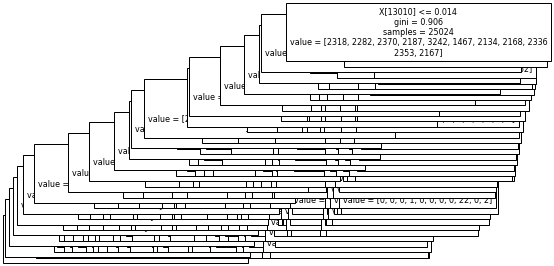

In [49]:
# 可视化决策树
import sklearn
sklearn.tree.plot_tree(gs.best_estimator_, fontsize=8)

In [84]:
# 决策树测词袋
from sklearn.tree import DecisionTreeClassifier

param= {
    "max_depth": [19],  ## 决策树最大层数从1-19
    "min_samples_leaf": [6] } ## 决策树子叶的最大样本数是1-19

# param = {'criterion':['gini','entropy'],
#         'max_depth':[10,15]
#         }
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs.fit(X_train_bag,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_bag)
print(classification_report(y_test,y_hat))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2; 1/1] START max_depth=19, min_samples_leaf=6............................
[CV 1/2; 1/1] END max_depth=19, min_samples_leaf=6;, score=0.642 total time=   1.0s
[CV 2/2; 1/1] START max_depth=19, min_samples_leaf=6............................
[CV 2/2; 1/1] END max_depth=19, min_samples_leaf=6;, score=0.647 total time=   1.0s
{'max_depth': 19, 'min_samples_leaf': 6}
              precision    recall  f1-score   support

           0       0.23      0.84      0.36       779
           1       0.92      0.78      0.84       758
          10       0.72      0.53      0.61       742
           2       0.91      0.59      0.71       737
           3       0.92      0.64      0.75      1025
           4       0.81      0.18      0.30       481
           5       0.94      0.82      0.88       782
           6       0.91      0.64      0.75       745
           7       0.91      0.91      0.91       772
           8       0.90      

[Text(0.9388449923996437, 0.975, 'X[13564] <= 0.5\ngini = 0.906\nsamples = 25024\nvalue = [2318, 2282, 2370, 2187, 3242, 1467, 2134, 2168, 2336\n2353, 2167]'),
 Text(0.8920526418908494, 0.925, 'X[10621] <= 0.5\ngini = 0.901\nsamples = 23218\nvalue = [2315, 2280, 2369, 2183, 3221, 1466, 2132, 2163, 608\n2352, 2129]'),
 Text(0.8415559121479466, 0.875, 'X[17288] <= 0.5\ngini = 0.903\nsamples = 21589\nvalue = [2304, 2277, 2366, 2168, 1730, 1466, 2126, 2159, 553\n2347, 2093]'),
 Text(0.7872410882097173, 0.825, 'X[9226] <= 0.5\ngini = 0.9\nsamples = 20310\nvalue = [2301, 2271, 2365, 2156, 1730, 1466, 882, 2147, 553\n2346, 2093]'),
 Text(0.7163134151986086, 0.775, 'X[12124] <= 0.5\ngini = 0.897\nsamples = 19061\nvalue = [2289, 1037, 2364, 2155, 1729, 1466, 882, 2147, 553\n2346, 2093]'),
 Text(0.6126088770758528, 0.725, 'X[10800] <= 0.5\ngini = 0.895\nsamples = 17638\nvalue = [2282, 1026, 2359, 2108, 1714, 1451, 875, 971, 541\n2236, 2075]'),
 Text(0.4861300072935368, 0.675, 'X[16747] <= 0.5\ng

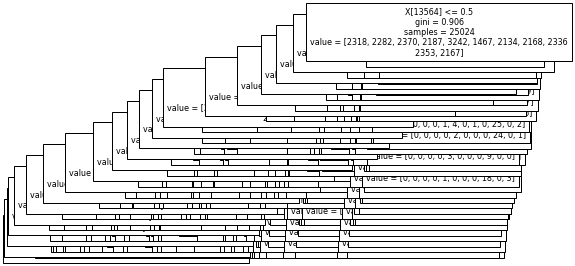

In [51]:
# 可视化决策树
sklearn.tree.plot_tree(gs.best_estimator_, fontsize=8)

In [43]:
#MLP测tf-idf
from sklearn.neural_network import MLPClassifier

param = {'hidden_layer_sizes':[(8,),(4,)],
        }
gs = GridSearchCV(estimator=MLPClassifier(),param_grid=param,
                 cv=2, n_jobs=-1, verbose=10)
gs.fit(X_train_tran,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'hidden_layer_sizes': (8,)}
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       779
           1       0.95      0.95      0.95       758
          10       0.87      0.90      0.88       742
           2       0.89      0.88      0.88       737
           3       0.83      0.87      0.85      1025
           4       0.89      0.85      0.87       481
           5       0.95      0.93      0.94       782
           6       0.95      0.95      0.95       745
           7       0.98      0.96      0.97       772
           8       0.92      0.93      0.93       743
           9       0.75      0.74      0.74       778

    accuracy                           0.88      8342
   macro avg       0.89      0.88      0.89      8342
weighted avg       0.88      0.88      0.88      8342



In [59]:
#MLP测词袋
from sklearn.neural_network import MLPClassifier

param = {'hidden_layer_sizes':[(8,),(4,),(2,),(3,),(5,),(6,),(7,),(9,)],
        }
gs = GridSearchCV(estimator=MLPClassifier(),param_grid=param,
                 cv=2, n_jobs=-1, verbose=10)
gs.fit(X_train_bag,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_bag)
print(classification_report(y_test,y_hat))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
{'hidden_layer_sizes': (9,)}
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       779
           1       0.94      0.94      0.94       758
          10       0.88      0.89      0.88       742
           2       0.89      0.88      0.88       737
           3       0.83      0.85      0.84      1025
           4       0.88      0.86      0.87       481
           5       0.92      0.93      0.93       782
           6       0.95      0.96      0.96       745
           7       0.98      0.95      0.96       772
           8       0.92      0.93      0.93       743
           9       0.73      0.74      0.74       778

    accuracy                           0.88      8342
   macro avg       0.88      0.88      0.88      8342
weighted avg       0.88      0.88      0.88      8342



In [45]:
# 朴素贝叶斯测tf-idf
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report

steps = [('dense',FunctionTransformer(func=lambda X: X.toarray(),accept_sparse=True)),
       ('model',None)
       ]
pipe = Pipeline(steps=steps)
param = {'model':[GaussianNB(),BernoulliNB(),MultinomialNB(),ComplementNB()]
        }
gs = GridSearchCV(estimator=pipe,param_grid=param,scoring="accuracy",
                 cv=2, n_jobs=2, verbose=10)
gs.fit(X_train_tran,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'model': ComplementNB()}
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       779
           1       0.91      0.92      0.91       758
          10       0.80      0.89      0.84       742
           2       0.91      0.89      0.90       737
           3       0.82      0.89      0.85      1025
           4       0.94      0.81      0.87       481
           5       0.92      0.96      0.94       782
           6       0.94      0.97      0.96       745
           7       0.94      0.97      0.95       772
           8       0.91      0.95      0.93       743
           9       0.80      0.64      0.71       778

    accuracy                           0.87      8342
   macro avg       0.88      0.87      0.87      8342
weighted avg       0.87      0.87      0.87      8342



In [80]:
# 朴素贝叶斯测词袋
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report

steps = [('dense',FunctionTransformer(func=lambda X: X.toarray(),accept_sparse=True)),
       ('model',None)
       ]
pipe = Pipeline(steps=steps)
param = {'model':[GaussianNB(),BernoulliNB(),MultinomialNB(),ComplementNB()]
        }
gs = GridSearchCV(estimator=pipe,param_grid=param,scoring="accuracy",
                 cv=2, verbose=10)
gs.fit(X_train_bag,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_bag)
print(classification_report(y_test,y_hat))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START model=GaussianNB()..........................................
[CV 1/2; 1/4] END ...........model=GaussianNB();, score=0.831 total time=  26.4s
[CV 2/2; 1/4] START model=GaussianNB()..........................................
[CV 2/2; 1/4] END ...........model=GaussianNB();, score=0.833 total time=  22.2s
[CV 1/2; 2/4] START model=BernoulliNB().........................................
[CV 1/2; 2/4] END ..........model=BernoulliNB();, score=0.839 total time=   4.0s
[CV 2/2; 2/4] START model=BernoulliNB().........................................
[CV 2/2; 2/4] END ..........model=BernoulliNB();, score=0.837 total time=   3.8s
[CV 1/2; 3/4] START model=MultinomialNB().......................................
[CV 1/2; 3/4] END ........model=MultinomialNB();, score=0.878 total time=   2.3s
[CV 2/2; 3/4] START model=MultinomialNB().......................................
[CV 2/2; 3/4] END ........model=MultinomialNB();, 